In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
print("ready")


ready


In [2]:
#loading the dataset
df = pd.read_csv("africa_food_prices.csv", low_memory=False)
df.head(5)

,Unnamed: 0,country_id,country,state_id,state,market_id,market,produce_id,produce,currency_id,currency,pt_id,market_type,um_unit_id,quantity,month,year,price,mp_commoditysource
0,15427,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,4,2015,90.0,NaN
1,15428,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,5,2015,96.0,NaN
2,15429,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,6,2015,96.0,NaN
3,15430,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,7,2015,83.0,NaN
4,15431,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,8,2015,80.0,NaN


In [3]:
#checking the available columns
df.columns

Index(['Unnamed: 0', 'country_id', 'country', 'state_id', 'state', 'market_id',
       'market', 'produce_id', 'produce', 'currency_id', 'currency', 'pt_id',
       'market_type', 'um_unit_id', 'quantity', 'month', 'year', 'price',
       'mp_commoditysource'],
      dtype='object')

In [4]:
# checking the size of the dataset
df.shape

(956779, 19)

In [5]:
# getting a detailed information about the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956779 entries, 0 to 956778
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Unnamed: 0          956779 non-null  int64  
 1   country_id          956779 non-null  float64
 2   country             956779 non-null  object 
 3   state_id            956779 non-null  int64  
 4   state               830101 non-null  object 
 5   market_id           956779 non-null  int64  
 6   market              956779 non-null  object 
 7   produce_id          956779 non-null  int64  
 8   produce             956779 non-null  object 
 9   currency_id         956779 non-null  float64
 10  currency            956779 non-null  object 
 11  pt_id               956779 non-null  int64  
 12  market_type         956779 non-null  object 
 13  um_unit_id          956779 non-null  int64  
 14  quantity            956779 non-null  object 
 15  month               956779 non-nul

In [6]:
#checking for data types to ensure they  match up
df.dtypes 


Unnamed: 0              int64
country_id            float64
country                object
state_id                int64
state                  object
market_id               int64
market                 object
produce_id              int64
produce                object
currency_id           float64
currency               object
pt_id                   int64
market_type            object
um_unit_id              int64
quantity               object
month                   int64
year                    int64
price                 float64
mp_commoditysource    float64
dtype: object

In [7]:
df.isnull().sum()#checking for null values

Unnamed: 0                 0
country_id                 0
country                    0
state_id                   0
state                 126678
market_id                  0
market                     0
produce_id                 0
produce                    0
currency_id                0
currency                   0
pt_id                      0
market_type                0
um_unit_id                 0
quantity                   0
month                      0
year                       0
price                      0
mp_commoditysource    956779
dtype: int64

In [8]:
# mp_commoditysource was remove because it is an empty column
df.drop("mp_commoditysource",  axis = 1, inplace = True) 


In [9]:
# removing the Unnamed: 0 column because it is not needed
df.drop("Unnamed: 0", axis = 1, inplace = True)


In [10]:
df['currency_id'].value_counts()

0.0    956779
Name: currency_id, dtype: int64

In [11]:
# removing currency id because it contains only zero
df.drop('currency_id', axis = 1, inplace= True)

In [12]:
# getting sample of the dataset
df.sample(15)

,country_id,country,state_id,state,market_id,market,produce_id,produce,currency,pt_id,market_type,um_unit_id,quantity,month,year,price
790649,205.0,Rwanda,21973,West/Iburengerazuba,2376,Kiziba (Camp),379,"Rice (long grain, high quality, local) - Retail",RWF,15,Retail,5,KG,9,2017,800.0000
205369,90.0,Gambia,1285,Central River,284,Kaur Wharf Town,388,Cucumbers - Retail,GMD,15,Retail,5,KG,3,2021,36.3970
355646,145.0,Libya,1836,NaN,2326,Brak,94,Meat (chicken) - Retail,LYD,15,Retail,5,KG,4,2019,10.9975
829328,221.0,Sierra Leone,2654,Eastern,1788,Kono,141,Meat (beef) - Retail,SLL,15,Retail,5,KG,11,2019,40000.0000
132534,49.0,Central African Republic,863,Ombella M'Poko,2058,Bimbo,141,Meat (beef) - Retail,XAF,15,Retail,5,KG,6,2020,5000.0000
743399,205.0,Rwanda,21972,South/Amajyepfo,1072,Kayenzi,52,Rice - Retail,RWF,15,Retail,5,KG,1,2015,600.0000
32802,29.0,Benin,618,Oueme,2762,Ahidahomè (Porto-Novo),360,Oranges - Retail,XOF,15,Retail,5,KG,12,2020,156.6700
913712,270.0,Zambia,3428,Eastern,370,Chipata,119,Groundnuts (shelled) - Retail,ZMW,15,Retail,5,KG,9,2013,8.3600
24519,29.0,Benin,614,Couffo,2769,Dogbo,534,"Peppers (red, dry) - Retail",XOF,15,Retail,5,KG,3,2021,4175.8200
901199,253.0,Uganda,47082,Lira,263,Lira,65,Sorghum - Retail,UGX,15,Retail,5,KG,6,2012,700.0000


In [13]:
# checking for null
df.isnull().sum()

country_id          0
country             0
state_id            0
state          126678
market_id           0
market              0
produce_id          0
produce             0
currency            0
pt_id               0
market_type         0
um_unit_id          0
quantity            0
month               0
year                0
price               0
dtype: int64

In [14]:
# it is only state column that has null values
df[df['state'].isnull()]

,country_id,country,state_id,state,market_id,market,produce_id,produce,currency,pt_id,market_type,um_unit_id,quantity,month,year,price
140847,50.0,Chad,0,NaN,1965,National Average,64,Rice (imported) - Retail,XAF,15,Retail,5,KG,11,2018,567.0
140848,50.0,Chad,0,NaN,1965,National Average,73,Millet - Retail,XAF,15,Retail,5,KG,10,2018,191.0
140849,50.0,Chad,0,NaN,1965,National Average,73,Millet - Retail,XAF,15,Retail,5,KG,11,2018,175.0
140850,50.0,Chad,0,NaN,1965,National Average,282,Sorghum (red) - Retail,XAF,15,Retail,5,KG,10,2018,172.0
140851,50.0,Chad,0,NaN,1965,National Average,282,Sorghum (red) - Retail,XAF,15,Retail,5,KG,11,2018,147.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889628,235.0,Swaziland,2784,NaN,2654,Manzini,432,Beans (sugar) - Retail,SZL,15,Retail,5,KG,5,2020,23.0
889629,235.0,Swaziland,2784,NaN,2654,Manzini,432,Beans (sugar) - Retail,SZL,15,Retail,5,KG,6,2020,22.5
889630,235.0,Swaziland,2784,NaN,2654,Manzini,432,Beans (sugar) - Retail,SZL,15,Retail,5,KG,7,2020,22.5
889631,235.0,Swaziland,2784,NaN,2654,Manzini,432,Beans (sugar) - Retail,SZL,15,Retail,5,KG,8,2020,22.5


In [15]:
# saving the state column
st_null=df[df['state'].isnull()] 

In [16]:
# checking state id unique values
st_null['state_id'].value_counts()

0        8302
2114     5708
1850     5427
2122     5339
2120     5164
         ... 
12924     270
12920     246
12905     246
12908       3
12907       2
Name: state_id, Length: 72, dtype: int64

In [17]:
# checking what the top id that has zero 
st_null[st_null['state_id'] == 0]


,country_id,country,state_id,state,market_id,market,produce_id,produce,currency,pt_id,market_type,um_unit_id,quantity,month,year,price
140847,50.0,Chad,0,NaN,1965,National Average,64,Rice (imported) - Retail,XAF,15,Retail,5,KG,11,2018,567.00
140848,50.0,Chad,0,NaN,1965,National Average,73,Millet - Retail,XAF,15,Retail,5,KG,10,2018,191.00
140849,50.0,Chad,0,NaN,1965,National Average,73,Millet - Retail,XAF,15,Retail,5,KG,11,2018,175.00
140850,50.0,Chad,0,NaN,1965,National Average,282,Sorghum (red) - Retail,XAF,15,Retail,5,KG,10,2018,172.00
140851,50.0,Chad,0,NaN,1965,National Average,282,Sorghum (red) - Retail,XAF,15,Retail,5,KG,11,2018,147.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886313,235.0,Swaziland,0,NaN,101,National Average,432,Beans (sugar) - Retail,SZL,15,Retail,5,KG,9,2019,23.13
886314,235.0,Swaziland,0,NaN,101,National Average,432,Beans (sugar) - Retail,SZL,15,Retail,5,KG,10,2019,23.13
886315,235.0,Swaziland,0,NaN,101,National Average,432,Beans (sugar) - Retail,SZL,15,Retail,5,KG,11,2019,23.88
886316,235.0,Swaziland,0,NaN,101,National Average,432,Beans (sugar) - Retail,SZL,15,Retail,5,KG,12,2019,23.13


In [18]:
# from line 28,  you will notice that the id with zero has no state and the market is National Average
# further checking if there is other case too
df[df['state_id']== 0]['market'].value_counts()

National Average    3446
Nalut               1328
Azzintan            1223
Ghat                1212
AlMarj              1093
Name: market, dtype: int64

In [19]:
# it shows that 4 other markets are among the  zero id 
# checking them one after thet other to see if the state is also NaN

In [20]:
df[df['market']=='Nalut']

,country_id,country,state_id,state,market_id,market,produce_id,produce,currency,pt_id,market_type,um_unit_id,quantity,month,year,price
343131,145.0,Libya,0,NaN,2339,Nalut,50,Beans - Retail,LYD,15,Retail,24,400 G,7,2017,2.5000
343132,145.0,Libya,0,NaN,2339,Nalut,50,Beans - Retail,LYD,15,Retail,24,400 G,8,2017,2.5000
343133,145.0,Libya,0,NaN,2339,Nalut,50,Beans - Retail,LYD,15,Retail,24,400 G,9,2017,2.5000
343134,145.0,Libya,0,NaN,2339,Nalut,50,Beans - Retail,LYD,15,Retail,24,400 G,10,2017,2.5000
343135,145.0,Libya,0,NaN,2339,Nalut,50,Beans - Retail,LYD,15,Retail,24,400 G,11,2017,2.5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344454,145.0,Libya,0,NaN,2339,Nalut,545,Shampoo - Retail,LYD,15,Retail,120,250 ML,1,2020,5.4000
344455,145.0,Libya,0,NaN,2339,Nalut,545,Shampoo - Retail,LYD,15,Retail,120,250 ML,2,2020,5.2063
344456,145.0,Libya,0,NaN,2339,Nalut,545,Shampoo - Retail,LYD,15,Retail,120,250 ML,3,2020,5.2288
344457,145.0,Libya,0,NaN,2339,Nalut,545,Shampoo - Retail,LYD,15,Retail,120,250 ML,5,2020,5.5000


In [21]:
df[df['market']=='Azzintan']

,country_id,country,state_id,state,market_id,market,produce_id,produce,currency,pt_id,market_type,um_unit_id,quantity,month,year,price
344459,145.0,Libya,0,NaN,2340,Azzintan,50,Beans - Retail,LYD,15,Retail,24,400 G,7,2017,2.5000
344460,145.0,Libya,0,NaN,2340,Azzintan,50,Beans - Retail,LYD,15,Retail,24,400 G,8,2017,2.5000
344461,145.0,Libya,0,NaN,2340,Azzintan,50,Beans - Retail,LYD,15,Retail,24,400 G,9,2017,2.5000
344462,145.0,Libya,0,NaN,2340,Azzintan,50,Beans - Retail,LYD,15,Retail,24,400 G,10,2017,2.5000
344463,145.0,Libya,0,NaN,2340,Azzintan,50,Beans - Retail,LYD,15,Retail,24,400 G,11,2017,2.5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345677,145.0,Libya,0,NaN,2340,Azzintan,545,Shampoo - Retail,LYD,15,Retail,120,250 ML,1,2020,5.2575
345678,145.0,Libya,0,NaN,2340,Azzintan,545,Shampoo - Retail,LYD,15,Retail,120,250 ML,2,2020,4.1250
345679,145.0,Libya,0,NaN,2340,Azzintan,545,Shampoo - Retail,LYD,15,Retail,120,250 ML,5,2020,7.1400
345680,145.0,Libya,0,NaN,2340,Azzintan,545,Shampoo - Retail,LYD,15,Retail,120,250 ML,6,2020,3.5700


In [22]:
df[df['market']=='Ghat']

,country_id,country,state_id,state,market_id,market,produce_id,produce,currency,pt_id,market_type,um_unit_id,quantity,month,year,price
346775,145.0,Libya,0,NaN,2342,Ghat,50,Beans - Retail,LYD,15,Retail,24,400 G,10,2017,2.50
346776,145.0,Libya,0,NaN,2342,Ghat,50,Beans - Retail,LYD,15,Retail,24,400 G,11,2017,2.88
346777,145.0,Libya,0,NaN,2342,Ghat,50,Beans - Retail,LYD,15,Retail,24,400 G,12,2017,3.50
346778,145.0,Libya,0,NaN,2342,Ghat,50,Beans - Retail,LYD,15,Retail,24,400 G,1,2018,3.00
346779,145.0,Libya,0,NaN,2342,Ghat,50,Beans - Retail,LYD,15,Retail,24,400 G,2,2018,3.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347982,145.0,Libya,0,NaN,2342,Ghat,545,Shampoo - Retail,LYD,15,Retail,120,250 ML,1,2020,9.25
347983,145.0,Libya,0,NaN,2342,Ghat,545,Shampoo - Retail,LYD,15,Retail,120,250 ML,2,2020,11.25
347984,145.0,Libya,0,NaN,2342,Ghat,545,Shampoo - Retail,LYD,15,Retail,120,250 ML,3,2020,12.00
347985,145.0,Libya,0,NaN,2342,Ghat,545,Shampoo - Retail,LYD,15,Retail,120,250 ML,5,2020,9.00


In [23]:
df[df['market']=='AlMarj']

,country_id,country,state_id,state,market_id,market,produce_id,produce,currency,pt_id,market_type,um_unit_id,quantity,month,year,price
345682,145.0,Libya,0,NaN,2341,AlMarj,50,Beans - Retail,LYD,15,Retail,24,400 G,12,2017,2.50
345683,145.0,Libya,0,NaN,2341,AlMarj,50,Beans - Retail,LYD,15,Retail,24,400 G,1,2018,2.75
345684,145.0,Libya,0,NaN,2341,AlMarj,50,Beans - Retail,LYD,15,Retail,24,400 G,2,2018,2.50
345685,145.0,Libya,0,NaN,2341,AlMarj,50,Beans - Retail,LYD,15,Retail,24,400 G,3,2018,2.50
345686,145.0,Libya,0,NaN,2341,AlMarj,50,Beans - Retail,LYD,15,Retail,24,400 G,4,2018,2.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346770,145.0,Libya,0,NaN,2341,AlMarj,545,Shampoo - Retail,LYD,15,Retail,120,250 ML,12,2019,5.00
346771,145.0,Libya,0,NaN,2341,AlMarj,545,Shampoo - Retail,LYD,15,Retail,120,250 ML,1,2020,5.00
346772,145.0,Libya,0,NaN,2341,AlMarj,545,Shampoo - Retail,LYD,15,Retail,120,250 ML,5,2020,7.00
346773,145.0,Libya,0,NaN,2341,AlMarj,545,Shampoo - Retail,LYD,15,Retail,120,250 ML,6,2020,8.00


In [24]:
# it is observed that the 5 markets that the state_id is zero has no state 
#  for the purpose of this analysis, i will replace the states with NaN with their market, National Average will be NAtional



In [25]:
#Replacing NaN value of rows with market as Ghat with Ghat
df.loc[df['market']=='Ghat', 'state']=df.loc[df['market']=='Ghat', 'state'].fillna(value='Ghat')

In [26]:
#Replacing NaN value of rows with market as National Average with national
df.loc[df['market']=='National Average', 'state']=df.loc[df['market']=='National Average', 'state'].fillna(value='National')

In [27]:
df[df['state']=='National'] 

,country_id,country,state_id,state,market_id,market,produce_id,produce,currency,pt_id,market_type,um_unit_id,quantity,month,year,price
140847,50.0,Chad,0,National,1965,National Average,64,Rice (imported) - Retail,XAF,15,Retail,5,KG,11,2018,567.00
140848,50.0,Chad,0,National,1965,National Average,73,Millet - Retail,XAF,15,Retail,5,KG,10,2018,191.00
140849,50.0,Chad,0,National,1965,National Average,73,Millet - Retail,XAF,15,Retail,5,KG,11,2018,175.00
140850,50.0,Chad,0,National,1965,National Average,282,Sorghum (red) - Retail,XAF,15,Retail,5,KG,10,2018,172.00
140851,50.0,Chad,0,National,1965,National Average,282,Sorghum (red) - Retail,XAF,15,Retail,5,KG,11,2018,147.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886313,235.0,Swaziland,0,National,101,National Average,432,Beans (sugar) - Retail,SZL,15,Retail,5,KG,9,2019,23.13
886314,235.0,Swaziland,0,National,101,National Average,432,Beans (sugar) - Retail,SZL,15,Retail,5,KG,10,2019,23.13
886315,235.0,Swaziland,0,National,101,National Average,432,Beans (sugar) - Retail,SZL,15,Retail,5,KG,11,2019,23.88
886316,235.0,Swaziland,0,National,101,National Average,432,Beans (sugar) - Retail,SZL,15,Retail,5,KG,12,2019,23.13


In [28]:
#Replacing NaN value of rows with market as Nalut with Nalut
df.loc[df['market']=='Nalut', 'state']=df.loc[df['market']=='Nalut', 'state'].fillna(value='Nalut') 

In [29]:
#checking
df[df['state']=='Nalut'] 

,country_id,country,state_id,state,market_id,market,produce_id,produce,currency,pt_id,market_type,um_unit_id,quantity,month,year,price
343131,145.0,Libya,0,Nalut,2339,Nalut,50,Beans - Retail,LYD,15,Retail,24,400 G,7,2017,2.5000
343132,145.0,Libya,0,Nalut,2339,Nalut,50,Beans - Retail,LYD,15,Retail,24,400 G,8,2017,2.5000
343133,145.0,Libya,0,Nalut,2339,Nalut,50,Beans - Retail,LYD,15,Retail,24,400 G,9,2017,2.5000
343134,145.0,Libya,0,Nalut,2339,Nalut,50,Beans - Retail,LYD,15,Retail,24,400 G,10,2017,2.5000
343135,145.0,Libya,0,Nalut,2339,Nalut,50,Beans - Retail,LYD,15,Retail,24,400 G,11,2017,2.5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344454,145.0,Libya,0,Nalut,2339,Nalut,545,Shampoo - Retail,LYD,15,Retail,120,250 ML,1,2020,5.4000
344455,145.0,Libya,0,Nalut,2339,Nalut,545,Shampoo - Retail,LYD,15,Retail,120,250 ML,2,2020,5.2063
344456,145.0,Libya,0,Nalut,2339,Nalut,545,Shampoo - Retail,LYD,15,Retail,120,250 ML,3,2020,5.2288
344457,145.0,Libya,0,Nalut,2339,Nalut,545,Shampoo - Retail,LYD,15,Retail,120,250 ML,5,2020,5.5000


In [30]:
#Replacing NaN value of rows with market as Azzintan with Azzintan
df.loc[df['market']=='Azzintan', 'state']=df.loc[df['market']=='Azzintan', 'state'].fillna(value='Azzintan') 

In [31]:
#checking
df[df['state']=='Azzintan'] 

,country_id,country,state_id,state,market_id,market,produce_id,produce,currency,pt_id,market_type,um_unit_id,quantity,month,year,price
344459,145.0,Libya,0,Azzintan,2340,Azzintan,50,Beans - Retail,LYD,15,Retail,24,400 G,7,2017,2.5000
344460,145.0,Libya,0,Azzintan,2340,Azzintan,50,Beans - Retail,LYD,15,Retail,24,400 G,8,2017,2.5000
344461,145.0,Libya,0,Azzintan,2340,Azzintan,50,Beans - Retail,LYD,15,Retail,24,400 G,9,2017,2.5000
344462,145.0,Libya,0,Azzintan,2340,Azzintan,50,Beans - Retail,LYD,15,Retail,24,400 G,10,2017,2.5000
344463,145.0,Libya,0,Azzintan,2340,Azzintan,50,Beans - Retail,LYD,15,Retail,24,400 G,11,2017,2.5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345677,145.0,Libya,0,Azzintan,2340,Azzintan,545,Shampoo - Retail,LYD,15,Retail,120,250 ML,1,2020,5.2575
345678,145.0,Libya,0,Azzintan,2340,Azzintan,545,Shampoo - Retail,LYD,15,Retail,120,250 ML,2,2020,4.1250
345679,145.0,Libya,0,Azzintan,2340,Azzintan,545,Shampoo - Retail,LYD,15,Retail,120,250 ML,5,2020,7.1400
345680,145.0,Libya,0,Azzintan,2340,Azzintan,545,Shampoo - Retail,LYD,15,Retail,120,250 ML,6,2020,3.5700


In [32]:
#Replacing NaN value of rows with market as AlMarj with Al Marj
df.loc[df['market']=='AlMarj', 'state']=df.loc[df['market']=='AlMarj', 'state'].fillna(value='AlMarj') 

In [33]:
df[df['state']=='AlMarj'] 

,country_id,country,state_id,state,market_id,market,produce_id,produce,currency,pt_id,market_type,um_unit_id,quantity,month,year,price
345682,145.0,Libya,0,AlMarj,2341,AlMarj,50,Beans - Retail,LYD,15,Retail,24,400 G,12,2017,2.50
345683,145.0,Libya,0,AlMarj,2341,AlMarj,50,Beans - Retail,LYD,15,Retail,24,400 G,1,2018,2.75
345684,145.0,Libya,0,AlMarj,2341,AlMarj,50,Beans - Retail,LYD,15,Retail,24,400 G,2,2018,2.50
345685,145.0,Libya,0,AlMarj,2341,AlMarj,50,Beans - Retail,LYD,15,Retail,24,400 G,3,2018,2.50
345686,145.0,Libya,0,AlMarj,2341,AlMarj,50,Beans - Retail,LYD,15,Retail,24,400 G,4,2018,2.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346770,145.0,Libya,0,AlMarj,2341,AlMarj,545,Shampoo - Retail,LYD,15,Retail,120,250 ML,12,2019,5.00
346771,145.0,Libya,0,AlMarj,2341,AlMarj,545,Shampoo - Retail,LYD,15,Retail,120,250 ML,1,2020,5.00
346772,145.0,Libya,0,AlMarj,2341,AlMarj,545,Shampoo - Retail,LYD,15,Retail,120,250 ML,5,2020,7.00
346773,145.0,Libya,0,AlMarj,2341,AlMarj,545,Shampoo - Retail,LYD,15,Retail,120,250 ML,6,2020,8.00


In [34]:
#Replacing NaN value of rows with market as Ghat with Ghat
df.loc[df['market']=='Ghat', 'state']=df.loc[df['market']=='Ghat', 'state'].fillna(value='Ghat')  

In [35]:
df[df['state']=='Ghat'] 

,country_id,country,state_id,state,market_id,market,produce_id,produce,currency,pt_id,market_type,um_unit_id,quantity,month,year,price
346775,145.0,Libya,0,Ghat,2342,Ghat,50,Beans - Retail,LYD,15,Retail,24,400 G,10,2017,2.50
346776,145.0,Libya,0,Ghat,2342,Ghat,50,Beans - Retail,LYD,15,Retail,24,400 G,11,2017,2.88
346777,145.0,Libya,0,Ghat,2342,Ghat,50,Beans - Retail,LYD,15,Retail,24,400 G,12,2017,3.50
346778,145.0,Libya,0,Ghat,2342,Ghat,50,Beans - Retail,LYD,15,Retail,24,400 G,1,2018,3.00
346779,145.0,Libya,0,Ghat,2342,Ghat,50,Beans - Retail,LYD,15,Retail,24,400 G,2,2018,3.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347982,145.0,Libya,0,Ghat,2342,Ghat,545,Shampoo - Retail,LYD,15,Retail,120,250 ML,1,2020,9.25
347983,145.0,Libya,0,Ghat,2342,Ghat,545,Shampoo - Retail,LYD,15,Retail,120,250 ML,2,2020,11.25
347984,145.0,Libya,0,Ghat,2342,Ghat,545,Shampoo - Retail,LYD,15,Retail,120,250 ML,3,2020,12.00
347985,145.0,Libya,0,Ghat,2342,Ghat,545,Shampoo - Retail,LYD,15,Retail,120,250 ML,5,2020,9.00


In [36]:
st_null = df[df['state'].isnull()] #reassigning the st-null to effect the changes 

In [37]:
st_null['state_id'].value_counts() # there is no more zero

2114     5708
1850     5427
2122     5339
2120     5164
2121     4776
         ... 
12924     270
12920     246
12905     246
12908       3
12907       2
Name: state_id, Length: 71, dtype: int64

In [38]:
st_null[st_null['state_id']==2114] #  it is noticed that the state with NaN is from Mozambique country

,country_id,country,state_id,state,market_id,market,produce_id,produce,currency,pt_id,market_type,um_unit_id,quantity,month,year,price
507654,170.0,Mozambique,2114,NaN,329,Inhambane,64,Rice (imported) - Retail,MZN,15,Retail,5,KG,6,2009,20.50
507655,170.0,Mozambique,2114,NaN,329,Inhambane,64,Rice (imported) - Retail,MZN,15,Retail,5,KG,7,2009,20.00
507656,170.0,Mozambique,2114,NaN,329,Inhambane,64,Rice (imported) - Retail,MZN,15,Retail,5,KG,8,2009,20.00
507657,170.0,Mozambique,2114,NaN,329,Inhambane,64,Rice (imported) - Retail,MZN,15,Retail,5,KG,9,2009,20.00
507658,170.0,Mozambique,2114,NaN,329,Inhambane,64,Rice (imported) - Retail,MZN,15,Retail,5,KG,10,2009,19.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513357,170.0,Mozambique,2114,NaN,2753,Vilanculos,431,"Maize meal (white, without bran) - Retail",MZN,15,Retail,5,KG,10,2020,41.67
513358,170.0,Mozambique,2114,NaN,2753,Vilanculos,431,"Maize meal (white, without bran) - Retail",MZN,15,Retail,5,KG,2,2021,47.22
513359,170.0,Mozambique,2114,NaN,2753,Vilanculos,431,"Maize meal (white, without bran) - Retail",MZN,15,Retail,5,KG,3,2021,47.00
513360,170.0,Mozambique,2114,NaN,2753,Vilanculos,431,"Maize meal (white, without bran) - Retail",MZN,15,Retail,5,KG,4,2021,47.22


In [39]:
#checking for other if there's other country that has 2114 State_id with NaN state.
df[df['state_id']==2114]['country'].value_counts()


Mozambique    5708
Name: country, dtype: int64

In [40]:
# checking further to see the Mozambique and the market correlation.
# Mozambique has different market 
# i will assign Maputo to the state that has  Mozambique country
df[df['country']=='Mozambique'] 

,country_id,country,state_id,state,market_id,market,produce_id,produce,currency,pt_id,market_type,um_unit_id,quantity,month,year,price
500878,170.0,Mozambique,0,National,1681,National Average,284,Fuel (diesel) - Retail,MZN,15,Retail,15,L,7,2014,36.2800
500879,170.0,Mozambique,0,National,1681,National Average,285,Fuel (petrol-gasoline) - Retail,MZN,15,Retail,15,L,7,2014,49.1700
500880,170.0,Mozambique,2112,NaN,323,Pemba,64,Rice (imported) - Retail,MZN,15,Retail,5,KG,4,2003,6.8306
500881,170.0,Mozambique,2112,NaN,323,Pemba,64,Rice (imported) - Retail,MZN,15,Retail,5,KG,5,2003,6.8306
500882,170.0,Mozambique,2112,NaN,323,Pemba,64,Rice (imported) - Retail,MZN,15,Retail,5,KG,6,2003,6.8306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543151,170.0,Mozambique,2122,NaN,337,Quelimane,431,"Maize meal (white, without bran) - Retail",MZN,15,Retail,5,KG,8,2020,40.0000
543152,170.0,Mozambique,2122,NaN,337,Quelimane,431,"Maize meal (white, without bran) - Retail",MZN,15,Retail,5,KG,9,2020,42.5000
543153,170.0,Mozambique,2122,NaN,337,Quelimane,431,"Maize meal (white, without bran) - Retail",MZN,15,Retail,5,KG,11,2020,40.0000
543154,170.0,Mozambique,2122,NaN,337,Quelimane,431,"Maize meal (white, without bran) - Retail",MZN,15,Retail,5,KG,4,2021,45.0000


In [41]:
# signing Maputo to state with Mozambique country
df.loc[df['country']=='Mozambique', 'state']=df.loc[df['country']=='Mozambique', 'state'].fillna(value='Maputo')  

In [42]:
df[df['state']== 'Maputo']

,country_id,country,state_id,state,market_id,market,produce_id,produce,currency,pt_id,market_type,um_unit_id,quantity,month,year,price
500880,170.0,Mozambique,2112,Maputo,323,Pemba,64,Rice (imported) - Retail,MZN,15,Retail,5,KG,4,2003,6.8306
500881,170.0,Mozambique,2112,Maputo,323,Pemba,64,Rice (imported) - Retail,MZN,15,Retail,5,KG,5,2003,6.8306
500882,170.0,Mozambique,2112,Maputo,323,Pemba,64,Rice (imported) - Retail,MZN,15,Retail,5,KG,6,2003,6.8306
500883,170.0,Mozambique,2112,Maputo,323,Pemba,64,Rice (imported) - Retail,MZN,15,Retail,5,KG,7,2003,6.8306
500884,170.0,Mozambique,2112,Maputo,323,Pemba,64,Rice (imported) - Retail,MZN,15,Retail,5,KG,8,2003,8.5383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543151,170.0,Mozambique,2122,Maputo,337,Quelimane,431,"Maize meal (white, without bran) - Retail",MZN,15,Retail,5,KG,8,2020,40.0000
543152,170.0,Mozambique,2122,Maputo,337,Quelimane,431,"Maize meal (white, without bran) - Retail",MZN,15,Retail,5,KG,9,2020,42.5000
543153,170.0,Mozambique,2122,Maputo,337,Quelimane,431,"Maize meal (white, without bran) - Retail",MZN,15,Retail,5,KG,11,2020,40.0000
543154,170.0,Mozambique,2122,Maputo,337,Quelimane,431,"Maize meal (white, without bran) - Retail",MZN,15,Retail,5,KG,4,2021,45.0000


In [43]:
# reassigning "state_id" to effect the changes
st_null=df[df['state'].isnull()]

In [44]:
st_null['state_id'].value_counts()

1850     5427
2747     2850
12912    2480
1844     2398
1843     2377
         ... 
12924     270
12920     246
12905     246
12908       3
12907       2
Name: state_id, Length: 61, dtype: int64

In [45]:
st_null[st_null['state_id']== 1850]

,country_id,country,state_id,state,market_id,market,produce_id,produce,currency,pt_id,market_type,um_unit_id,quantity,month,year,price
376903,145.0,Libya,1850,NaN,2316,Abusliem,50,Beans - Retail,LYD,15,Retail,24,400 G,1,2018,2.50
376904,145.0,Libya,1850,NaN,2316,Abusliem,50,Beans - Retail,LYD,15,Retail,24,400 G,2,2018,2.00
376905,145.0,Libya,1850,NaN,2316,Abusliem,50,Beans - Retail,LYD,15,Retail,24,400 G,3,2018,2.50
376906,145.0,Libya,1850,NaN,2316,Abusliem,50,Beans - Retail,LYD,15,Retail,24,400 G,4,2018,2.40
376907,145.0,Libya,1850,NaN,2316,Abusliem,50,Beans - Retail,LYD,15,Retail,24,400 G,7,2018,2.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382325,145.0,Libya,1850,NaN,2513,Tajoura,545,Shampoo - Retail,LYD,15,Retail,120,250 ML,2,2020,2.75
382326,145.0,Libya,1850,NaN,2513,Tajoura,545,Shampoo - Retail,LYD,15,Retail,120,250 ML,3,2020,2.75
382327,145.0,Libya,1850,NaN,2513,Tajoura,545,Shampoo - Retail,LYD,15,Retail,120,250 ML,5,2020,2.75
382328,145.0,Libya,1850,NaN,2513,Tajoura,545,Shampoo - Retail,LYD,15,Retail,120,250 ML,6,2020,2.75


In [46]:
# checking if there is other in libya that have NaN
df[df['state_id']==1850]['market'].value_counts()

Suq Aljumaa       1137
Abusliem          1135
Tripoli center     858
Hai Alandalus      845
Tajoura            743
Ain Zara           709
Name: market, dtype: int64

In [47]:
# replacing the NAN in state with Tripoli
df.loc[df['country']=='Libya', 'state']=df.loc[df['country']=='Libya', 'state'].fillna(value='Tripoli')

In [48]:
df[df['state']== 'Tripoli']

,country_id,country,state_id,state,market_id,market,produce_id,produce,currency,pt_id,market_type,um_unit_id,quantity,month,year,price
347987,145.0,Libya,1829,Tripoli,2320,Ejdabia,50,Beans - Retail,LYD,15,Retail,24,400 G,1,2018,2.00
347988,145.0,Libya,1829,Tripoli,2320,Ejdabia,50,Beans - Retail,LYD,15,Retail,24,400 G,2,2018,2.00
347989,145.0,Libya,1829,Tripoli,2320,Ejdabia,50,Beans - Retail,LYD,15,Retail,24,400 G,3,2018,2.13
347990,145.0,Libya,1829,Tripoli,2320,Ejdabia,50,Beans - Retail,LYD,15,Retail,24,400 G,4,2018,2.30
347991,145.0,Libya,1829,Tripoli,2320,Ejdabia,50,Beans - Retail,LYD,15,Retail,24,400 G,5,2018,2.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384284,145.0,Libya,1852,Tripoli,2514,Yefren,545,Shampoo - Retail,LYD,15,Retail,120,250 ML,2,2020,2.75
384285,145.0,Libya,1852,Tripoli,2514,Yefren,545,Shampoo - Retail,LYD,15,Retail,120,250 ML,3,2020,2.75
384286,145.0,Libya,1852,Tripoli,2514,Yefren,545,Shampoo - Retail,LYD,15,Retail,120,250 ML,5,2020,3.88
384287,145.0,Libya,1852,Tripoli,2514,Yefren,545,Shampoo - Retail,LYD,15,Retail,120,250 ML,6,2020,3.88


In [49]:
#reassigning 'st_null' to effect the changes
st_null=df[df['state'].isnull()]


In [50]:
st_null['state_id'].value_counts()

2747     2850
12912    2480
12918    2280
37021    2127
2748     2114
2746     1993
2766     1944
2754     1792
2783     1657
2750     1406
2751     1307
12915    1269
12927    1243
870      1074
881      1073
2765     1050
2768     1045
12923    1003
873       921
12914     887
2782      829
2784      829
12928     735
12925     729
876       721
12910     588
875       586
12921     552
12904     495
12922     424
12911     405
12930     320
12931     303
12924     270
12920     246
12905     246
12908       3
12907       2
Name: state_id, dtype: int64

In [51]:
# will be assigning the countries that does not have their capital 
df[df['state_id']==2747 ]

,country_id,country,state_id,state,market_id,market,produce_id,produce,currency,pt_id,market_type,um_unit_id,quantity,month,year,price
859861,70001.0,South Sudan,2747,NaN,1385,Bentiu,52,Rice - Retail,SSP,15,Retail,5,KG,4,2018,250.0
859862,70001.0,South Sudan,2747,NaN,1385,Bentiu,52,Rice - Retail,SSP,15,Retail,5,KG,12,2018,475.0
859863,70001.0,South Sudan,2747,NaN,1385,Bentiu,52,Rice - Retail,SSP,15,Retail,5,KG,3,2019,461.0
859864,70001.0,South Sudan,2747,NaN,1385,Bentiu,52,Rice - Retail,SSP,15,Retail,5,KG,4,2019,571.0
859865,70001.0,South Sudan,2747,NaN,1385,Bentiu,52,Rice - Retail,SSP,15,Retail,5,KG,7,2019,857.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862706,70001.0,South Sudan,2747,NaN,3026,Aniet,758,Milk (fresh) - Retail,SSP,15,Retail,15,L,3,2021,1050.0
862707,70001.0,South Sudan,2747,NaN,3026,Aniet,758,Milk (fresh) - Retail,SSP,15,Retail,15,L,4,2021,1000.0
862708,70001.0,South Sudan,2747,NaN,3026,Aniet,758,Milk (fresh) - Retail,SSP,15,Retail,15,L,5,2021,640.0
862709,70001.0,South Sudan,2747,NaN,3026,Aniet,758,Milk (fresh) - Retail,SSP,15,Retail,15,L,6,2021,600.0


In [52]:
#replacing the 'NaN' row of state with JUBA
df.loc[df['country']=='South Sudan', 'state']=df.loc[df['country']=='South Sudan', 'state'].fillna(value='Juba')

In [53]:
df[df['state']=='Juba']


,country_id,country,state_id,state,market_id,market,produce_id,produce,currency,pt_id,market_type,um_unit_id,quantity,month,year,price
857868,70001.0,South Sudan,2746,Juba,1390,Rumbek,52,Rice - Retail,SSP,15,Retail,5,KG,3,2018,296.0
857869,70001.0,South Sudan,2746,Juba,1390,Rumbek,52,Rice - Retail,SSP,15,Retail,5,KG,4,2018,295.0
857870,70001.0,South Sudan,2746,Juba,1390,Rumbek,52,Rice - Retail,SSP,15,Retail,5,KG,8,2018,300.0
857871,70001.0,South Sudan,2746,Juba,1390,Rumbek,52,Rice - Retail,SSP,15,Retail,5,KG,9,2018,300.0
857872,70001.0,South Sudan,2746,Juba,1390,Rumbek,52,Rice - Retail,SSP,15,Retail,5,KG,10,2018,220.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875491,70001.0,South Sudan,37021,Juba,3029,Melut,758,Milk (fresh) - Retail,SSP,15,Retail,15,L,1,2021,250.0
875492,70001.0,South Sudan,37021,Juba,3029,Melut,758,Milk (fresh) - Retail,SSP,15,Retail,15,L,2,2021,500.0
875493,70001.0,South Sudan,37021,Juba,3029,Melut,758,Milk (fresh) - Retail,SSP,15,Retail,15,L,5,2021,580.0
875494,70001.0,South Sudan,37021,Juba,3029,Melut,758,Milk (fresh) - Retail,SSP,15,Retail,15,L,6,2021,600.0


In [54]:
# reassigning 'st_null to effect the change
st_null=df[df['state'].isnull()]
st_null['state_id'].value_counts()

12912    2480
12918    2280
2783     1657
12915    1269
12927    1243
870      1074
881      1073
12923    1003
873       921
12914     887
2784      829
2782      829
12928     735
12925     729
876       721
12910     588
875       586
12921     552
12904     495
12922     424
12911     405
12930     320
12931     303
12924     270
12920     246
12905     246
12908       3
12907       2
Name: state_id, dtype: int64

In [55]:
df[df['state_id']==12912]

,country_id,country,state_id,state,market_id,market,produce_id,produce,currency,pt_id,market_type,um_unit_id,quantity,month,year,price
147002,50.0,Chad,12912,NaN,234,Ndjamena,51,Maize - Retail,XAF,15,Retail,5,KG,10,2003,132.0
147003,50.0,Chad,12912,NaN,234,Ndjamena,51,Maize - Retail,XAF,15,Retail,5,KG,11,2003,112.0
147004,50.0,Chad,12912,NaN,234,Ndjamena,51,Maize - Retail,XAF,15,Retail,5,KG,12,2003,121.0
147005,50.0,Chad,12912,NaN,234,Ndjamena,51,Maize - Retail,XAF,15,Retail,5,KG,1,2004,121.0
147006,50.0,Chad,12912,NaN,234,Ndjamena,51,Maize - Retail,XAF,15,Retail,5,KG,2,2004,119.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149477,50.0,Chad,12912,NaN,2716,Massaguet,478,Sorghum (berbere) - Retail,XAF,15,Retail,5,KG,1,2021,173.0
149478,50.0,Chad,12912,NaN,2716,Massaguet,478,Sorghum (berbere) - Retail,XAF,15,Retail,5,KG,2,2021,160.0
149479,50.0,Chad,12912,NaN,2716,Massaguet,478,Sorghum (berbere) - Retail,XAF,15,Retail,5,KG,3,2021,160.0
149480,50.0,Chad,12912,NaN,2716,Massaguet,478,Sorghum (berbere) - Retail,XAF,15,Retail,5,KG,5,2021,173.0


In [56]:
# replacing row  that has NaN with N'Djamena
df.loc[df['country']=='Chad', 'state']=df.loc[df['country']=='Chad','state'].fillna(value='N\'Djamena')
df[df['state']=='N\'Djamena']


,country_id,country,state_id,state,market_id,market,produce_id,produce,currency,pt_id,market_type,um_unit_id,quantity,month,year,price
140888,50.0,Chad,870,N'Djamena,2294,Biltine,64,Rice (imported) - Retail,XAF,15,Retail,5,KG,10,2015,780.0
140889,50.0,Chad,870,N'Djamena,2294,Biltine,64,Rice (imported) - Retail,XAF,15,Retail,5,KG,11,2015,770.0
140890,50.0,Chad,870,N'Djamena,2294,Biltine,64,Rice (imported) - Retail,XAF,15,Retail,5,KG,12,2015,760.0
140891,50.0,Chad,870,N'Djamena,2294,Biltine,64,Rice (imported) - Retail,XAF,15,Retail,5,KG,1,2016,760.0
140892,50.0,Chad,870,N'Djamena,2294,Biltine,64,Rice (imported) - Retail,XAF,15,Retail,5,KG,2,2016,770.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159738,50.0,Chad,12931,N'Djamena,1963,Kélo,477,"Livestock (goat, medium-sized castrated male) ...",XAF,15,Retail,61,Head,1,2021,13833.0
159739,50.0,Chad,12931,N'Djamena,1963,Kélo,477,"Livestock (goat, medium-sized castrated male) ...",XAF,15,Retail,61,Head,2,2021,15000.0
159740,50.0,Chad,12931,N'Djamena,1963,Kélo,477,"Livestock (goat, medium-sized castrated male) ...",XAF,15,Retail,61,Head,3,2021,20865.5
159741,50.0,Chad,12931,N'Djamena,1963,Kélo,477,"Livestock (goat, medium-sized castrated male) ...",XAF,15,Retail,61,Head,5,2021,13500.0


In [57]:
#reassigning 'st_null' to effect changes
st_null = df[df['state'].isnull()]
st_null['state_id'].value_counts()


2783    1657
2782     829
2784     829
Name: state_id, dtype: int64

In [58]:
df[df['state_id']==2783]

,country_id,country,state_id,state,market_id,market,produce_id,produce,currency,pt_id,market_type,um_unit_id,quantity,month,year,price
887147,235.0,Swaziland,2783,NaN,2656,Lubombo,52,Rice - Retail,SZL,15,Retail,5,KG,1,2014,9.59
887148,235.0,Swaziland,2783,NaN,2656,Lubombo,52,Rice - Retail,SZL,15,Retail,5,KG,2,2014,9.59
887149,235.0,Swaziland,2783,NaN,2656,Lubombo,52,Rice - Retail,SZL,15,Retail,5,KG,3,2014,9.59
887150,235.0,Swaziland,2783,NaN,2656,Lubombo,52,Rice - Retail,SZL,15,Retail,5,KG,4,2014,9.59
887151,235.0,Swaziland,2783,NaN,2656,Lubombo,52,Rice - Retail,SZL,15,Retail,5,KG,5,2014,9.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
888799,235.0,Swaziland,2783,NaN,2657,Shiselweni,432,Beans (sugar) - Retail,SZL,15,Retail,5,KG,5,2020,25.00
888800,235.0,Swaziland,2783,NaN,2657,Shiselweni,432,Beans (sugar) - Retail,SZL,15,Retail,5,KG,6,2020,25.00
888801,235.0,Swaziland,2783,NaN,2657,Shiselweni,432,Beans (sugar) - Retail,SZL,15,Retail,5,KG,7,2020,25.00
888802,235.0,Swaziland,2783,NaN,2657,Shiselweni,432,Beans (sugar) - Retail,SZL,15,Retail,5,KG,8,2020,25.00


In [59]:
# replacing rows that have "NaN with Mbabane
df.loc[df['country']=='Swaziland','state']=df.loc[df['country']=='Swaziland'].fillna(value='Mbabane')
df[df['state']=='Mbabane']

,country_id,country,state_id,state,market_id,market,produce_id,produce,currency,pt_id,market_type,um_unit_id,quantity,month,year,price
886318,235.0,Swaziland,2782,Mbabane,2655,Hhohho,52,Rice - Retail,SZL,15,Retail,5,KG,1,2014,9.995
886319,235.0,Swaziland,2782,Mbabane,2655,Hhohho,52,Rice - Retail,SZL,15,Retail,5,KG,2,2014,9.995
886320,235.0,Swaziland,2782,Mbabane,2655,Hhohho,52,Rice - Retail,SZL,15,Retail,5,KG,3,2014,9.995
886321,235.0,Swaziland,2782,Mbabane,2655,Hhohho,52,Rice - Retail,SZL,15,Retail,5,KG,4,2014,9.995
886322,235.0,Swaziland,2782,Mbabane,2655,Hhohho,52,Rice - Retail,SZL,15,Retail,5,KG,5,2014,9.995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889628,235.0,Swaziland,2784,Mbabane,2654,Manzini,432,Beans (sugar) - Retail,SZL,15,Retail,5,KG,5,2020,23.000
889629,235.0,Swaziland,2784,Mbabane,2654,Manzini,432,Beans (sugar) - Retail,SZL,15,Retail,5,KG,6,2020,22.500
889630,235.0,Swaziland,2784,Mbabane,2654,Manzini,432,Beans (sugar) - Retail,SZL,15,Retail,5,KG,7,2020,22.500
889631,235.0,Swaziland,2784,Mbabane,2654,Manzini,432,Beans (sugar) - Retail,SZL,15,Retail,5,KG,8,2020,22.500


In [60]:
#reassigning 'st_null' to effect the changes
st_null=df[df['state'].isnull()]
st_null['state_id'].value_counts()

Series([], Name: state_id, dtype: int64)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956779 entries, 0 to 956778
Data columns (total 16 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country_id   956779 non-null  float64
 1   country      956779 non-null  object 
 2   state_id     956779 non-null  int64  
 3   state        956779 non-null  object 
 4   market_id    956779 non-null  int64  
 5   market       956779 non-null  object 
 6   produce_id   956779 non-null  int64  
 7   produce      956779 non-null  object 
 8   currency     956779 non-null  object 
 9   pt_id        956779 non-null  int64  
 10  market_type  956779 non-null  object 
 11  um_unit_id   956779 non-null  int64  
 12  quantity     956779 non-null  object 
 13  month        956779 non-null  int64  
 14  year         956779 non-null  int64  
 15  price        956779 non-null  float64
dtypes: float64(2), int64(7), object(7)
memory usage: 116.8+ MB


### changing the data type

In [62]:
# it is  only country_id data type that is not in order
# changing it from float to int
df['country_id'] = df['country_id'].astype(int)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956779 entries, 0 to 956778
Data columns (total 16 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country_id   956779 non-null  int32  
 1   country      956779 non-null  object 
 2   state_id     956779 non-null  int64  
 3   state        956779 non-null  object 
 4   market_id    956779 non-null  int64  
 5   market       956779 non-null  object 
 6   produce_id   956779 non-null  int64  
 7   produce      956779 non-null  object 
 8   currency     956779 non-null  object 
 9   pt_id        956779 non-null  int64  
 10  market_type  956779 non-null  object 
 11  um_unit_id   956779 non-null  int64  
 12  quantity     956779 non-null  object 
 13  month        956779 non-null  int64  
 14  year         956779 non-null  int64  
 15  price        956779 non-null  float64
dtypes: float64(1), int32(1), int64(7), object(7)
memory usage: 113.1+ MB


In [64]:
# Renaming columns to  their description
df.rename(columns={'pt_id':'market type id', 'um_unit_id':'measurement id'}, inplace=True)

In [65]:
df.columns

Index(['country_id', 'country', 'state_id', 'state', 'market_id', 'market',
       'produce_id', 'produce', 'currency', 'market type id', 'market_type',
       'measurement id', 'quantity', 'month', 'year', 'price'],
      dtype='object')

In [66]:
df.describe()

,country_id,state_id,market_id,produce_id,market type id,measurement id,month,year,price
count,956779.000000,956779.000000,956779.000000,956779.000000,956779.000000,956779.000000,956779.000000,956779.000000,9.567790e+05
mean,1961.192782,22287.911831,1392.594222,186.141214,14.926716,14.017183,6.381471,2015.704015,4.128833e+03
std,10404.034922,98565.608270,1027.751212,165.401303,0.263570,24.437728,3.418025,4.603829,1.381840e+05
min,4.000000,0.000000,101.000000,50.000000,14.000000,5.000000,1.000000,1990.000000,0.000000e+00
25%,90.000000,1836.000000,528.000000,67.000000,15.000000,5.000000,3.000000,2013.000000,6.500000e+01
50%,155.000000,2209.000000,1078.000000,105.000000,15.000000,5.000000,6.000000,2017.000000,2.505714e+02
75%,205.000000,21971.000000,2281.000000,262.000000,15.000000,9.000000,9.000000,2020.000000,7.221005e+02
max,70001.000000,900003.000000,6081.000000,887.000000,17.000000,175.000000,12.000000,2021.000000,1.725000e+07


In [67]:
df.sample(5)

,country_id,country,state_id,state,market_id,market,produce_id,produce,currency,market type id,market_type,measurement id,quantity,month,year,price
320533,133,Kenya,51331,Rift Valley,3244,Kalobeyei (Village 1),254,Bananas - Retail,KES,15,Retail,33,Unit,1,2021,20.000
411586,152,Malawi,1890,Southern Region,799,Mwanza,50,Beans - Retail,MWK,15,Retail,5,KG,1,2015,585.205
929115,270,Zambia,3432,Northern,372,Isoka,119,Groundnuts (shelled) - Retail,ZMW,15,Retail,5,KG,4,2020,12.660
208586,90,Gambia,1285,Central River,916,Brikamaba,117,"Rice (paddy, long grain, local) - Retail",GMD,15,Retail,5,KG,8,2009,14.000
415725,152,Malawi,1890,Southern Region,2231,Thekelani,51,Maize - Retail,MWK,15,Retail,5,KG,2,2017,200.000


## RESEARCH QUESTION

- what are the overall trends in African food price over the period
- How does food  price vary with produce
- Are there any noticeable seasonal patterns in the price fluctuations of specific produce
- which market type recorded more sale
- are there certain locality that consistently experienxe higher food price inflation than others
- How does price of produce vary across different market






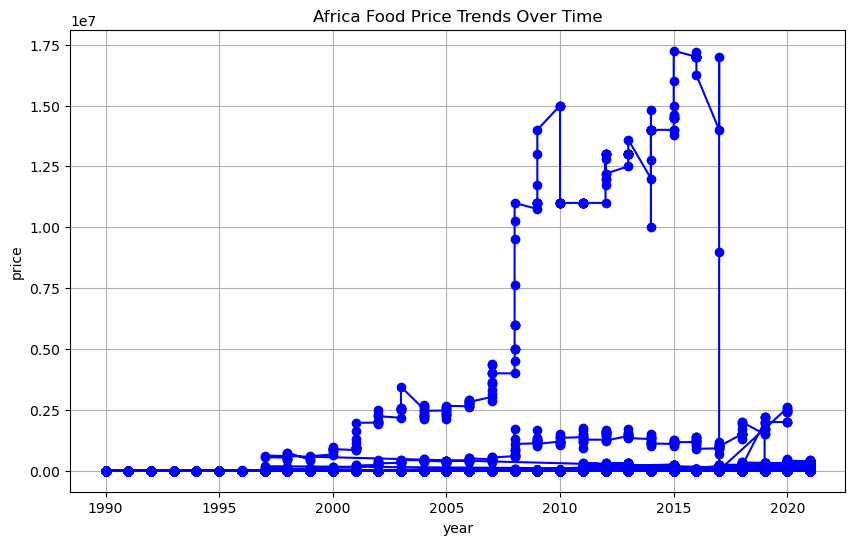

In [68]:
#Q1 what are the overall trends in Afriac food price over the period

plt.figure(figsize=(10,6))
plt.plot(df['year'], df['price'], marker='o', linestyle='-', color='b')
plt.xlabel('year')
plt.ylabel('price')
plt.title('Africa Food Price Trends Over Time')
plt.grid(True)
plt.show()

In [69]:
# from the above chart, year 2015 have the highest price increament


###  Q2. How does food  price vary with produce

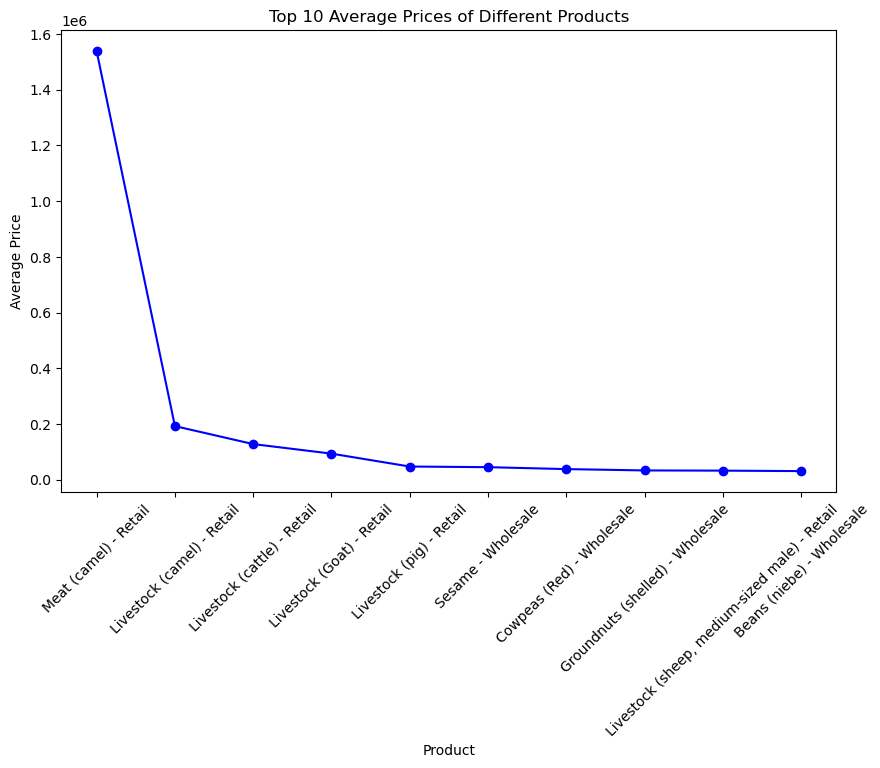

In [70]:
# Calculate the average price for each product
avg_prices = df.groupby('produce')['price'].mean().reset_index()
avg_prices = avg_prices.sort_values(by='price', ascending=False)

top_10_products = avg_prices.head(10)

# Plotting the line graph
plt.figure(figsize=(10, 6))
plt.plot(top_10_products['produce'], top_10_products['price'], marker='o', linestyle='-', color='b')

# Adding labels and title
plt.xlabel('Product')
plt.ylabel('Average Price')
plt.title('Top 10 Average Prices of Different Products')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


 ### Q3. Are there any noticeable seasonal patterns in the price fluctuations of specific produce

In [71]:
produce=df['produce'].value_counts()
produce

Millet - Retail                     47476
Rice (imported) - Retail            47022
Sorghum - Retail                    44679
Maize - Retail                      43073
Maize (white) - Retail              33786
                                    ...  
Millet (white) - Wholesale              1
Potatoes (unica) - Retail               1
Kocho - Retail                          1
Beans (haricot, red) - Wholesale        1
Sorghum (biofortified) - Retail         1
Name: produce, Length: 457, dtype: int64

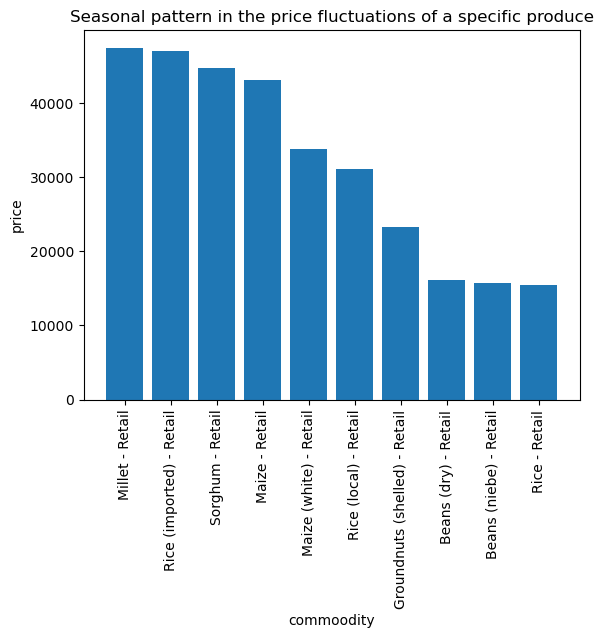

In [72]:
x=list(dict(produce).keys())[:10]
y=list(dict(produce).values())[:10]

plt.bar(x, y)

plt.xticks(rotation='vertical')

plt.title("Seasonal pattern in the price fluctuations of a specific produce") #title
plt.xlabel("commoodity")
plt.ylabel("price")

plt.show()

### Q4. Which Market type had the most sales

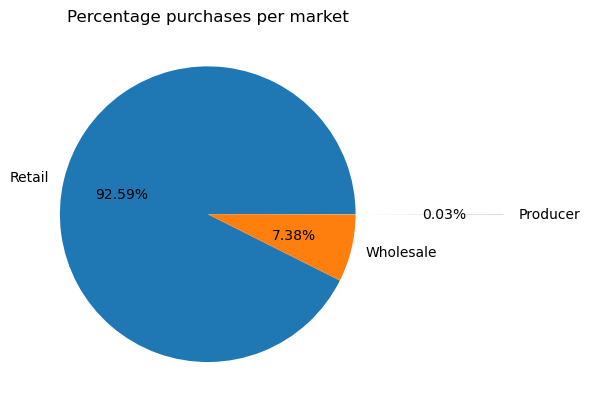

In [78]:
fig3, ax1=plt.subplots()

pie_data=df['market_type'].value_counts()

ax1.pie(pie_data, labels=pie_data.index, autopct='%1.2f%%', explode=[0,0,1])

plt.title("Percentage purchases per market")

plt.show()


### Q5. How does price of produce vary across different market

In [74]:
df['produce'].unique

<bound method Series.unique of 0                   Rice - Retail
1                   Rice - Retail
2                   Rice - Retail
3                   Rice - Retail
4                   Rice - Retail
                   ...           
956774     Beans (sugar) - Retail
956775        Toothpaste - Retail
956776      Laundry soap - Retail
956777     Handwash soap - Retail
956778    Fish (kapenta) - Retail
Name: produce, Length: 956779, dtype: object>

In [75]:
grouped =df.groupby('produce')

In [76]:
grouped.first()

,country_id,country,state_id,state,market_id,market,produce_id,currency,market type id,market_type,measurement id,quantity,month,year,price
produce,,,,,,,,,,,,,,,
Apples (red) - Retail,90,Gambia,1285,Central River,279,Bansang,229,GMD,15,Retail,5,KG,9,2013,43.7600
Apples - Retail,4,Algeria,344,Alger,1794,Algiers,345,DZD,15,Retail,5,KG,4,2015,140.0000
Avocados - Retail,43,Burundi,40542,Bubanza,1827,Musenyi,454,BIF,15,Retail,5,KG,10,2014,332.3333
Bananas (imported) - Retail,105,Guinea-Bissau,1388,Cacheu,3105,Cacheu,803,XOF,15,Retail,5,KG,5,2020,900.0000
Bananas (local) - Retail,105,Guinea-Bissau,1385,Bafata,1922,Kirintim,707,XOF,15,Retail,5,KG,7,2020,500.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yam (yellow) - Retail,29,Benin,609,Alibori,2771,Karimama,763,XOF,15,Retail,5,KG,4,2020,325.0000
Yam - Retail,29,Benin,609,Alibori,1044,Malanville (CBM),99,XOF,15,Retail,5,KG,7,2019,270.0000
Yam - Wholesale,94,Ghana,1324,Ashanti,215,Kumasi,99,GHS,14,Wholesale,128,250 KG,1,2006,63.3800


In [77]:
type(dict(produce).keys())

dict_keys

In [79]:
cunty_prc_yr = df[['country','year','price']]
cunty_prc_yr

,country,year,price
0,Algeria,2015,90.0000
1,Algeria,2015,96.0000
2,Algeria,2015,96.0000
3,Algeria,2015,83.0000
4,Algeria,2015,80.0000
...,...,...,...
956774,Zimbabwe,2021,233.3333
956775,Zimbabwe,2021,112.5000
956776,Zimbabwe,2021,114.0000
956777,Zimbabwe,2021,59.5000


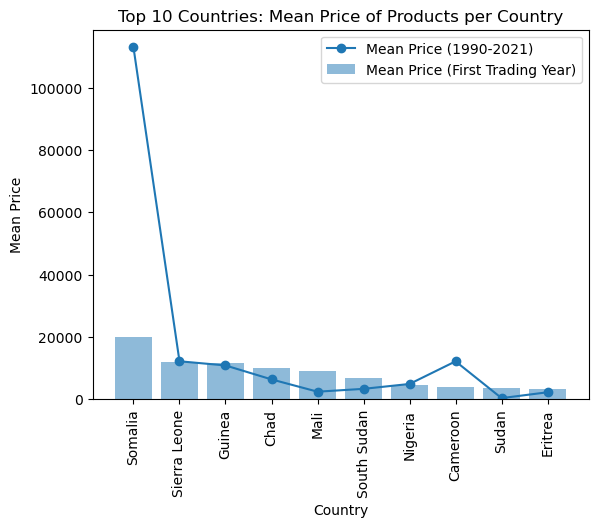

In [80]:
# Find the first available year for each country
first_year_per_country = cunty_prc_yr.groupby('country')['year'].min()

selected_years = cunty_prc_yr.set_index('country')['year'].to_dict()

selected_rows = cunty_prc_yr[cunty_prc_yr.apply(lambda row: row['year'] == selected_years.get(row['country']), axis=1)]

# Selecting top 10 countries based on mean price
top_10_countries = selected_rows.groupby('country')['price'].mean().nlargest(10)

# Calculating mean price per country for the line graph
mean_price_line_graph = cunty_prc_yr.groupby('country')['price'].mean()

# Selecting only the top 10 countries for the line graph
mean_price_line_graph_top_10 = mean_price_line_graph.loc[top_10_countries.index]

# Plotting the line graph
plt.plot(mean_price_line_graph_top_10.index, mean_price_line_graph_top_10.values, label='Mean Price (1990-2021)', marker='o')

# Plotting the bar chart
plt.bar(top_10_countries.index, top_10_countries.values, label='Mean Price (First Trading Year)', alpha=0.5)

# Adding labels and legend
plt.xlabel('Country')
plt.ylabel('Mean Price')
plt.title('Top 10 Countries: Mean Price of Products per Country')
plt.xticks(rotation='vertical')
plt.legend()

# Display the plot
plt.show()


### Q6  How does price of produce vary across different market

In [81]:
table1=pd.DataFrame(pd.DataFrame(df.groupby("market")["price"].mean())["price"].nlargest(10))
table1.rename({table1.columns[0]:'Average Price Paid'}, axis=1, inplace=True)
table1

,Average Price Paid
market,
Gaalkacyo,882326.878557
Jariiban,44113.657143
Eyl,43310.835479
Qardho,37802.710493
Garowe,36537.142857
Dhuusamarreeb,36309.716012
Agazrahane,35813.721739
Amachach,32350.034483
Doolow,30820.525022
